In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sns

%matplotlib inline
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

In [13]:
cars = pd.read_csv('mtcars.csv')

In [32]:
cars.columns
cars.columns.name = 'car-features'
cars.head(15)

car-features,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Index_col,,,,,,,,,,,,
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


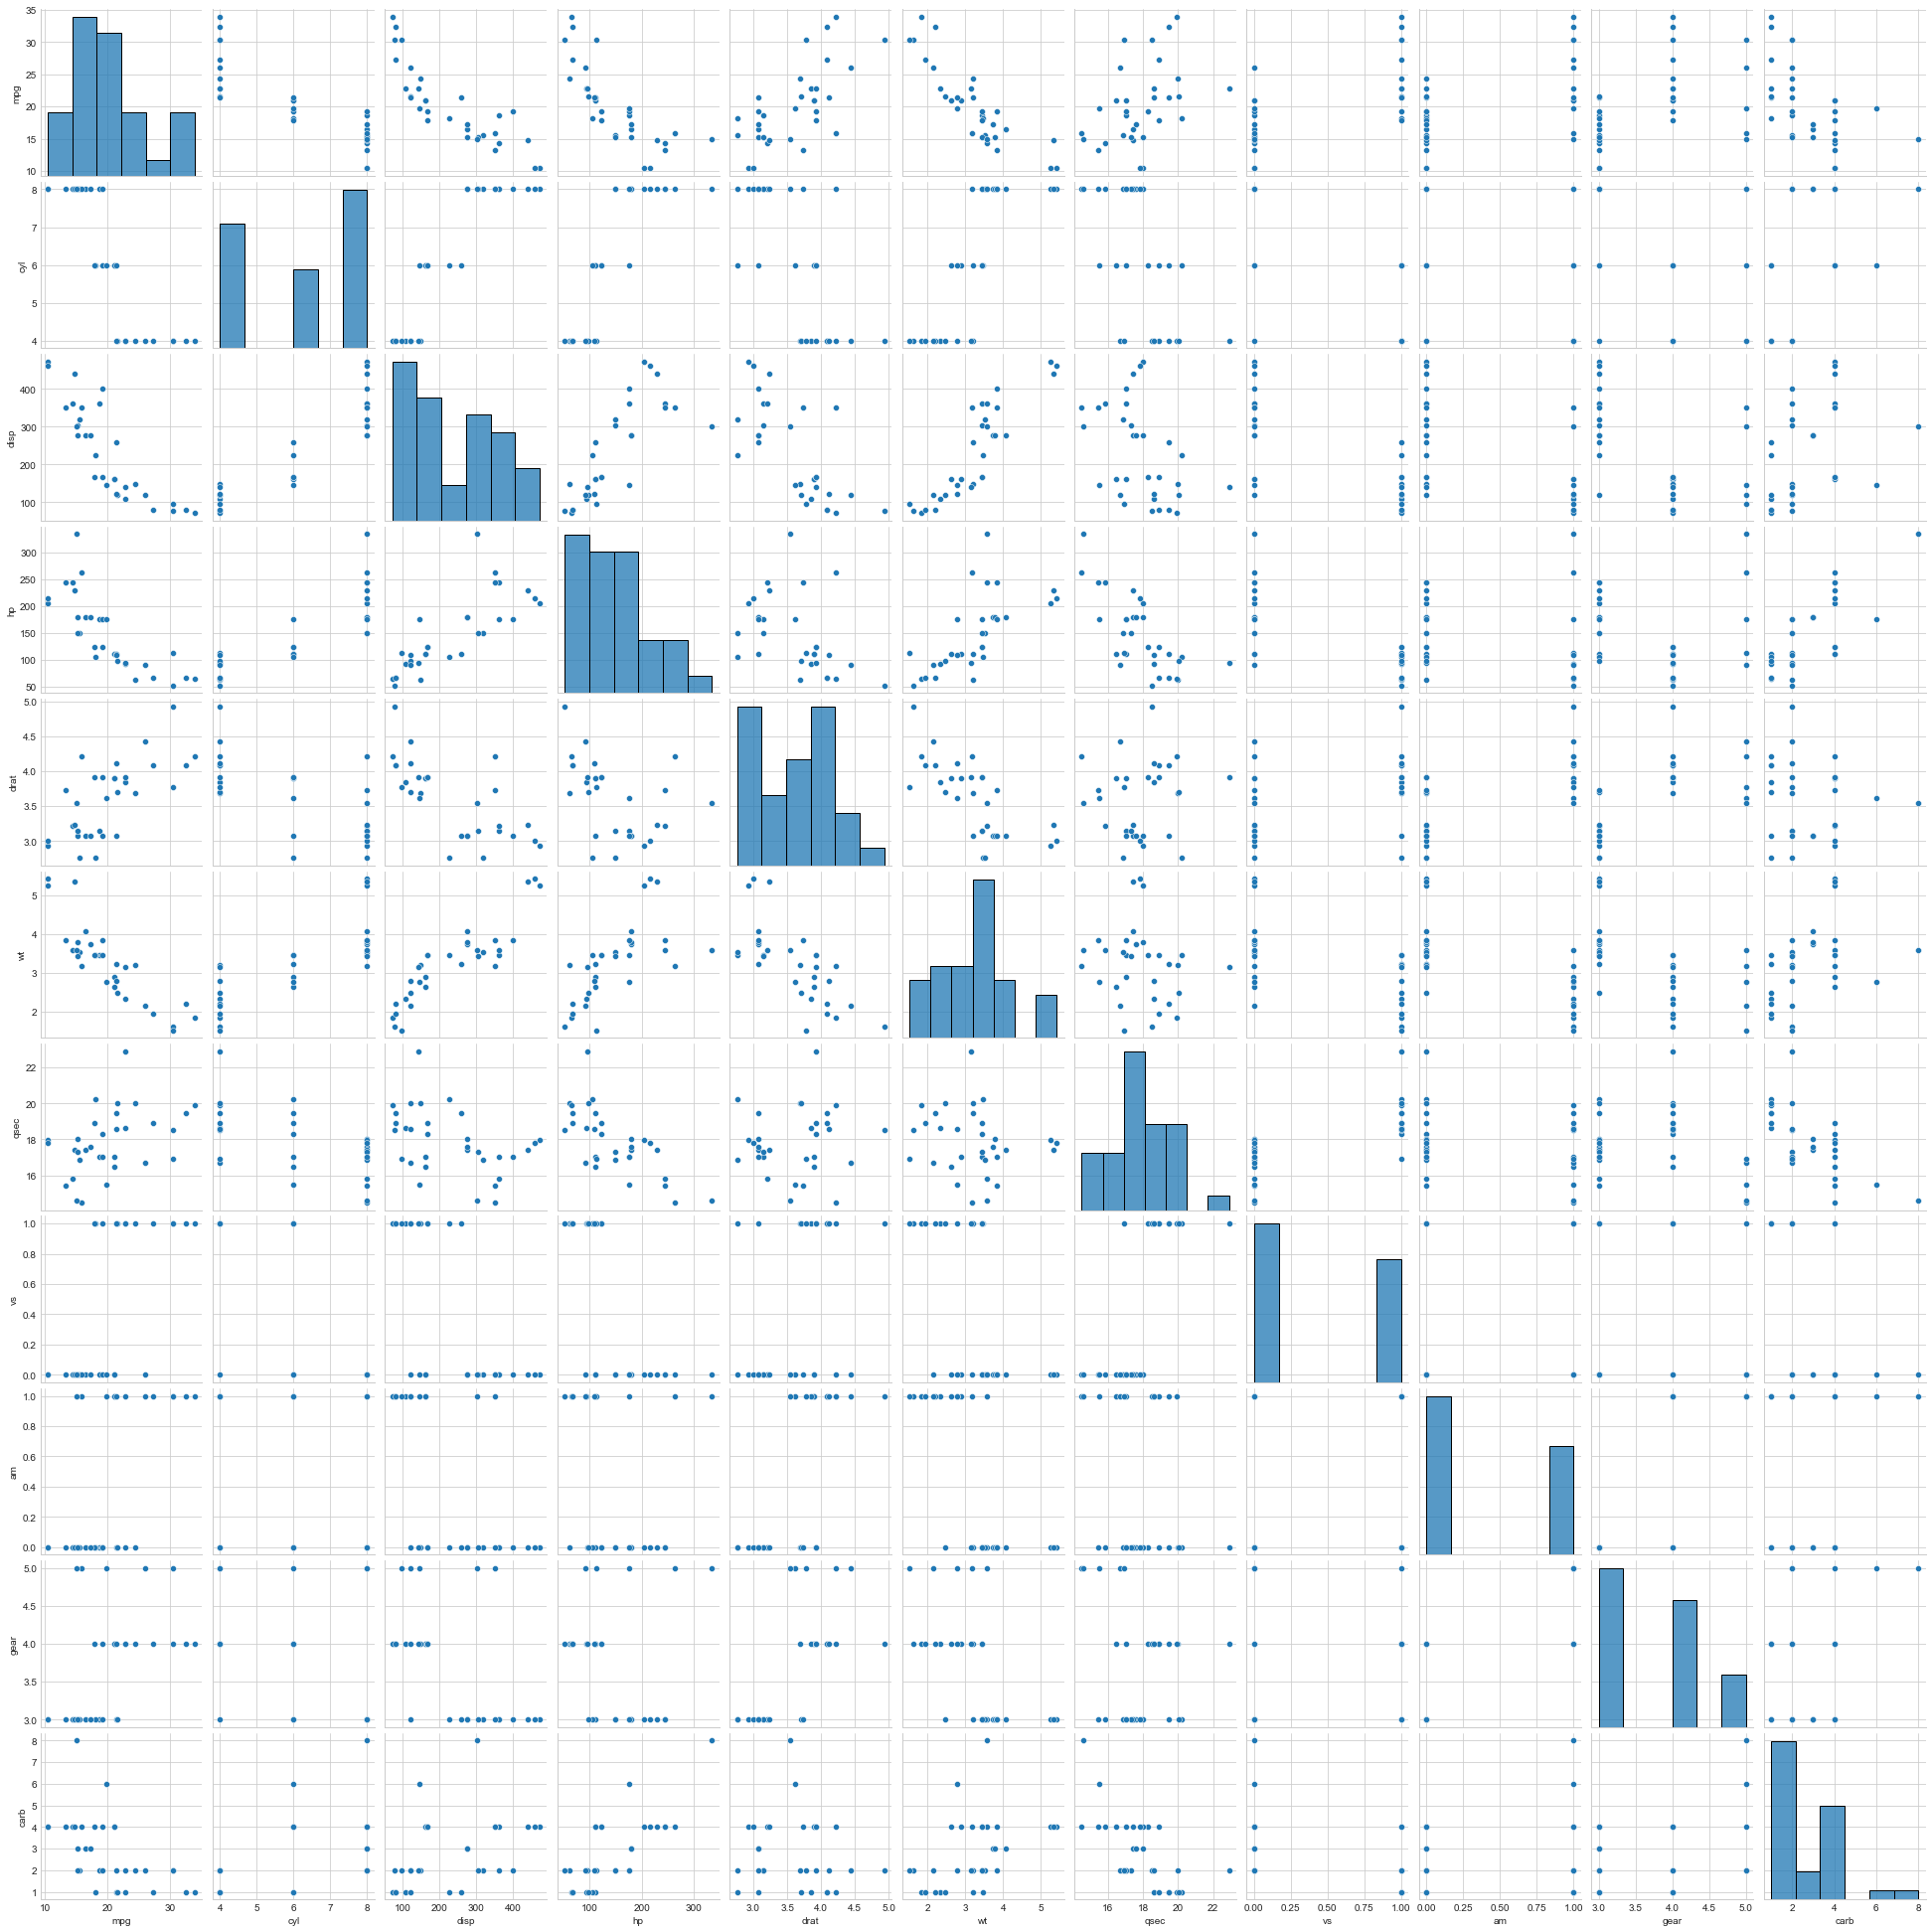

In [33]:
sns.pairplot(cars)

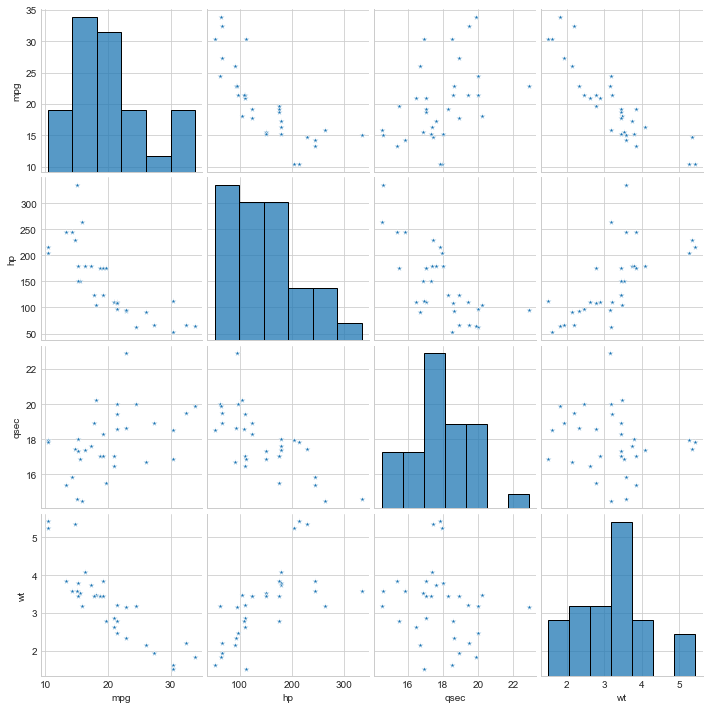

In [38]:
part = cars[['mpg', 'hp', 'qsec', 'wt']]
sns.pairplot(part, markers='*')

In [56]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearson_coefficient, p_value = pearsonr(mpg, hp)
print('PearonR Correlation Coefficient %0.3f '% pearson_coefficient)

PearonR Correlation Coefficient -0.776 


In [55]:
pearson_coefficient, p_value = pearsonr(mpg, qsec)
print('PearonR Correlation Coefficient %0.3f '% pearson_coefficient)

PearonR Correlation Coefficient 0.419 


In [54]:
pearson_coefficient, p_value = pearsonr(mpg, wt)
print('PearonR Correlation Coefficient %0.3f '% pearson_coefficient)

PearonR Correlation Coefficient -0.868 


In [48]:
correlation = part.corr()
correlation

car-features,mpg,hp,qsec,wt
car-features,,,,
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


<AxesSubplot:xlabel='car-features', ylabel='car-features'>

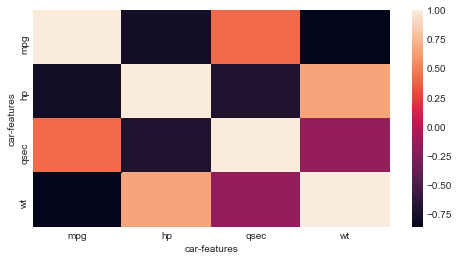

In [49]:
sns.heatmap(correlation, xticklabels=part.columns.values, yticklabels=part.columns.values)

In [50]:
cars.head()

car-features,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Index_col,,,,,,,,,,,,
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


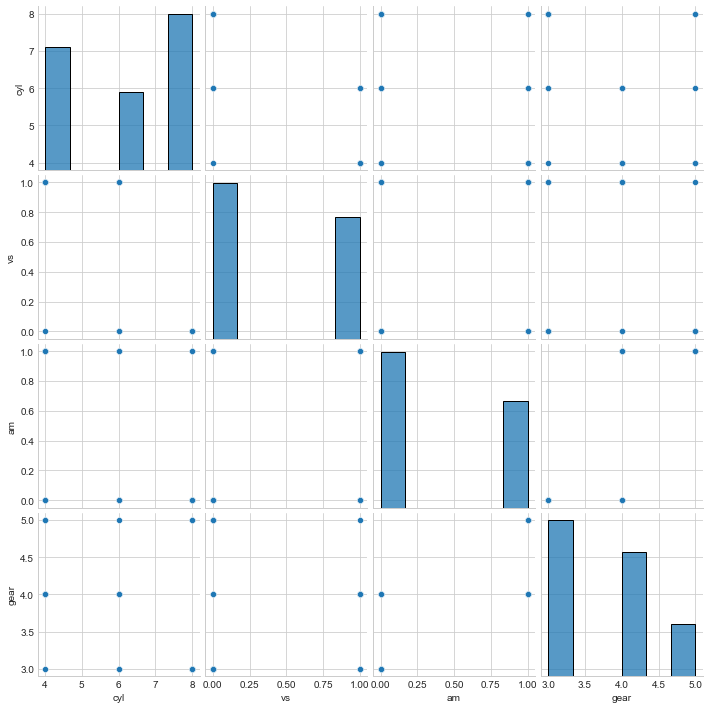

In [53]:
x = cars[['cyl', 'vs', 'am','gear']]
sns.pairplot(x)

In [59]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print('Spearman Rank Correlation Coefficient = %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient = -0.814


In [60]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)
print('Spearman Rank Correlation Coefficient = %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient = -0.522


In [61]:
spearmanr_coefficient, p_value = spearmanr(cyl, gear)
print('Spearman Rank Correlation Coefficient = %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient = -0.564


In [66]:
table = pd.crosstab(cyl, am)
table

am,0,1
cyl,,
4,3,8
6,4,3
8,12,2


In [70]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
print('Chi-square statistics %0.3f p_value %0.3f' % (chi2, p_value))

Chi-square statistics 8.741 p_value 0.001


In [71]:
table = pd.crosstab(cyl, vs)
chi2, p, dof, expected = chi2_contingency(table)
print('Chi-square statistics %0.3f p_value %0.3f' % (chi2, p_value))

Chi-square statistics 21.340 p_value 0.001


In [72]:
table = pd.crosstab(cyl, wt)
chi2, p, dof, expected = chi2_contingency(table)
print('Chi-square statistics %0.3f p_value %0.3f' % (chi2, p_value))

Chi-square statistics 59.429 p_value 0.001
